<a href="https://colab.research.google.com/github/gitnicolas343/Quamtum_machine_learning/blob/main/5_Quantum_computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
!pip install -U qiskit-aer pylatexenc matplotlib qiskit[visualization] > /dev/null

In [82]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from qiskit import transpile

#Computación cuantica basada en compuertas.

---

El modelo de computación cuántica que hemos estudiado basado en compuertas representa el diseño estándar para algoritmos cuánticos por lo que un algoritmo cuántico se expresa mediante un **circuito cuántico**, compuesto por una secuencia de **compuertas unitarias reversibles** y **mediciones irreversibles** aplicadas a un registro de **qubits** representados como una línea en el circuito, mientras que los bits clásicos (output) se muestran con líneas dobles.

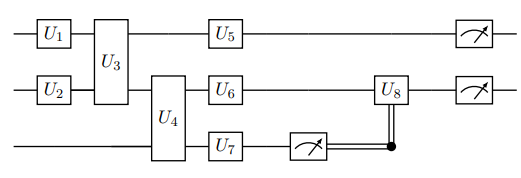

como se ilustra en la figura  se  involucra una serie de compuertas aplicadas a uno o dos qubits, donde el resultado clásico de una medición puede **controlar** una operación posterior, como una compuerta $X$ o la identidad $I$, dependiendo del valor del cbit. Sin embargo, como las mediciones son irreversibles, este tipo de control difiere de las compuertas cuánticas controladas tradicionales, que sí son reversibles. A pesar de ello, gracias al **principio de medición diferida**, es posible reestructurar el circuito para posponer las mediciones al final, sustituyendo las operaciones dependientes de mediciones por compuertas controladas.

El resultado final de un algoritmo cuántico puede obtenerse de dos maneras:

1. **Computación cuántica probabilística**: Se mide el circuito una sola vez, produciendo una salida aleatoria debido a la naturaleza probabilística de la mecánica cuántica. Esto implementa una forma de computación estocástica.

2. **Computación cuántica determinista**: Se ejecuta el circuito múltiples veces y se calcula un promedio de las mediciones. Esto permite estimar valores esperados de observables, concepto fundamental en tareas como la simulación de sistemas físicos.

Este modelo permite aprovechar propiedades únicas de la información cuántica, como el **paralelismo cuántico**, haciendo posible el desarrollo de algoritmos más eficientes que sus equivalentes clásicos.


Una vez presentado el modelo  de computación cuántica basado en compuertas, odemos introducir un bloque fundamental para la construcción de algoritmos cuánticos: el operador de desplazamiento controlado (controlled shift operator). Esta compuerta cuántica resulta útil para  evaluar funciones binarias, es decir, funciones que asignan un valor de salida clásico (0 o 1) a cada entrada binaria; por otro lado, facilita la implementación de una memoria de acceso aleatorio cuántica (quantum RAM),lo cual es esencial para el almacenamiento y recuperación eficiente de información cuántica.

# Operador de Shift


---


El **operador de desplazamiento** $X^{\otimes a}$  dentro del modelo de computación basado en compuertas en la  cual  dado un registro de $m$ qubits y una cadena binaria $a = a_0, a_1, \dots, a_{m-1} \in \{0,1\}^m$, este operador aplica de forma individual la compuerta identidad $I$ o la compuerta de Pauli-X $X$ sobre cada qubit $k \in \{0,1,\dots,m-1\}$, dependiendo del valor del bit $a_k$. La definición  del operador es:

$$
X^{\otimes a} = X^{a_0} \otimes X^{a_1} \otimes \cdots \otimes X^{a_{m-1}},
$$


En cuyo caso es un  **string de Pauli**, ya que consiste en productos tensoriales secuenciales de los  operadores $I$ y $X$ sobre cada qubit individuale.

Por ejemplo, si se tienen $m = 2$ qubits y un string de control $a = 01$, entonces:

$$
X^{\otimes 01} = I \otimes X,
$$

lo cual significa que se aplica $I$ al primer qubit y $X$ al segundo.

El operador recibe el nombre de "operador de desplazamiento" ya que computacional realiza un cambio de base mediante una operación de tipo **XOR**. Sea $y = y_0, y_1, \dots, y_{m-1} \in \{0,1\}^m$ un string binario, el resultado de aplicar el operador $X^{\otimes a}$ sobre un estado base $|y\rangle$ es:

$$
X^{\otimes a} |y\rangle = |y \oplus a\rangle,
$$

donde $y \oplus a$ es la operación bit a bit XOR entre los strings $y$ y $a$, es decir:

$$
y \oplus a = (y_0 \oplus a_0, y_1 \oplus a_1, \dots, y_{m-1} \oplus a_{m-1}).
$$

Puede escribirse en forma matricial, usando proyectores sobre la base computacional:

$$
X^{\otimes a} = \sum_{y=0}^{2^m - 1} |y \oplus a\rangle \langle y|.
$$

Por ejemplo, con $a = 01$, el operador se representa como:

$$
X^{\otimes 01} = |01\rangle \langle00| + |00\rangle \langle01| + |11\rangle \langle10| + |10\rangle \langle11|,
$$



Ahora consideremos un sistema uncantico;  un primer subconjunto con $n$ qubits  y un segundo con $m$ qubits, veamos el efecto de la aplicacion del operador $X^{\otimes a}$ al segundo subconjunto lo cual equivale a la aplicacion $I \otimes X^{\otimes a}$ esta acción se puede describir por medio de la siguiente transformación unitaria:

$$
(I \otimes X^{\otimes a})\,|x, y\rangle = |x, y \oplus a\rangle \tag{4.7}
$$

Aquí, $|x\rangle$ representa el estado del subconjunto de control con $n$ qubits, $|y\rangle$ representa el estado del subconjunto objetivo con $m$ qubits, y la operación $\oplus$ indica la operacion XOR entre los vectores binarios $y$ y $a$,.La forma matricial de esta operación unitaria se puede escribir como:

$$
I \otimes X^{\otimes a} = \sum_{x=0}^{2^n - 1} \sum_{y=0}^{2^m - 1} |x, y \oplus a\rangle \langle x, y| \tag{4.8}
$$

Ahora  consideremos una **función binaria** $f$, que toma como entrada una cadena de $n$ bits  y devuelve una cadena de $m$ bits. Esta función se denota como:

$$
f(x) = \big(f_0(x), \dots, f_{m-1}(x)\big) \in \{0, 1\}^m \tag{4.9}
$$

Basándose en esta función $f$, podemos definir el **operador de desplazamiento controlado**, que depende del valor del registro de control $|x\rangle$. Su forma general es:

$$
CX^{\otimes f} = \sum_{x=0}^{2^n - 1} |x\rangle \langle x| \otimes \left( X^{f_0(x)} \otimes \cdots \otimes X^{f_{m-1}(x)} \right) \tag{4.10}
$$

Lo cual se interpreta como una operación que, en cada rama computacional en la que el registro de control se encuentra en el estado $|x\rangle$, aplica al segundo subconjunto de qubits  el operador de desplazamiento $X^{\otimes f(x)}$

Este operador, a diferencia de las compuertas controladas simples como la CNOT, puede aplicar diferentes operaciones en cada rama del registro de control, lo que le da una mayor flexibilidad y lo convierte en una herramienta fundamental tanto para calcular funciones binarias.

Además, el operador $CX^{\otimes f}$ es una generalización de la compuerta CNOT. Si se toma un caso más simple, con un solo qubit de control y uno de objetivo es decir, $n = m = 1$  y se define $f(x) = x$, entonces se recupera exactamente la acción de la CNOT, donde el operador $X$ se aplica al qubit objetivo si y solo si el qubit de control está en el estado $|1\rangle$.

---

### **Cómputo de una Función Binaria**

Ahora usaremos el **operador de desplazamiento controlado** $CX^{ \otimes f}$ para evaluar la función binaria $f(\cdot)$. Como se anticipó en la Sección 2.6.6, los **circuitos cuánticos** pueden usarse para implementar **funciones binarias reversibles** cuando las entradas están restringidas a vectores en la **base computacional**.

En tanto, mostraremos aquí que el operador controlado $CX \otimes f$ implementa la función $f(\cdot)$ de manera reversible sobre la base computacional.


Primero observamos que el operador unitario $CX \otimes f$ **transforma** cualquier vector $|x, y\rangle$ de la base computacional en:

$$
CX^{ \otimes f }\; |x, y\rangle = |x, y \oplus f(x)\rangle
$$

El operador también se puede escribir como:

$$
CX \otimes f =\sum_{x=0}^{2^n - 1}\sum_{y=0}^{2^m - 1}|x, y \oplus f(x)\rangle \langle x, y|
$$

Esto significa que cada entrada $|x, y\rangle$ se transforma en $|x, y \oplus f(x)\rangle$ es **reversible**, para cualquier función binaria $f$.

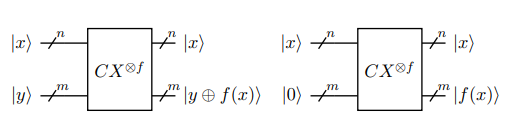

Después de aplicar $CX \otimes f$, el resultado es el estado:

$$
|x\rangle \otimes |f(x)\rangle
$$

Al medir el segundo registro (los $m$ qubits de salida), se obtiene la cadena binaria $f(x)$ con probabilidad 1.


### Ejemplo

**Caso con $m = n = 2$** y una función:

$$
f(x) = x
$$

Entonces, se aplica el operador $CX \otimes f$ con:




$$
|x\rangle \otimes |y\rangle \mapsto |x\rangle \otimes |y \oplus x\rangle
$$

Si por ejemplo:

* $|x\rangle = |01\rangle$
* $|y\rangle = |10\rangle$

Entonces el resultado es:
estado incial:
$$
|x\rangle \otimes |y\rangle =|01\rangle \otimes |10 \rangle   = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}\otimes \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}
$$   

estado final:

$$|01\rangle \otimes |10 \oplus 01\rangle = |01\rangle \otimes |11\rangle = \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}\otimes \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} $$   




Estado inicial: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
Estado final  : Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


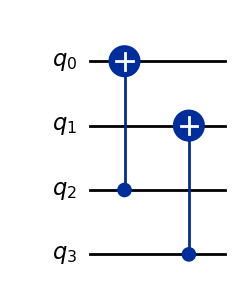

In [83]:
#preparamos |x> y |y> directamente con Statevector.from_label
state_x = Statevector.from_label('01')   # |x>  = |01>
state_y = Statevector.from_label('10')   # |y>  = |10>

#Estado total = |x> ⊗ |y>

state_initial = state_x.tensor(state_y)
print("Estado inicial:", state_initial)

#de 4 qubits (sin puertas X)
qc = QuantumCircuit(4)


qc.cx(2,0)
qc.cx(3, 1)

#Evolucionamos el estado inicial con el circuito
state_final = state_initial.evolve(qc)
print("Estado final  :", state_final)


qc.draw('mpl')

In [84]:
state_final.draw('latex')

<IPython.core.display.Latex object>

# Memoria RAM cuantica:

---


La **QRAM** es una memoria cuántica que, a diferencia de la RAM clásica, permite consultar múltiples posiciones de una base de datos de forma simultánea gracias al principio de superposición.

En un sistema con $n$ qubits de entrada (que codifican el índice) y $m$ qubits de salida (que almacenan los datos), la QRAM aplica una compuerta controlada $CX^ {\otimes f}$ que actúa de la siguiente forma: si el registro de entrada está en una superposición de índices $\sum_x \alpha_x |x\rangle$ y la salida está inicialmente en $|0\rangle$, el sistema evoluciona al estado entrelazado:

$$
\sum_{x=0}^{2^n - 1} \alpha_x \, |x, f(x)\rangle
$$

Esto significa que con una sola operación, la QRAM puede codificar todas las respuestas posibles de la base de datos en un solo estado cuántico. Sin embargo, al medir, el sistema colapsa a una única respuesta $|x, f(x)\rangle$, con probabilidad $|\alpha_x|^2$, como si se hubiese consultado una dirección aleatoria con probabilidad dada por los coeficientes $\alpha_x$.

Este mecanismo no permite leer toda la base de datos en una sola medición, pero sí habilita algoritmos cuánticos que explotan el **paralelismo cuántico** para procesar simultáneamente múltiples datos antes de medir.


#Ejemplo

Para la funcion $f(x)$ usamos:

* **2 qubits de dirección**: permiten 4 direcciones posibles → 00, 01, 10, 11.
* **1 qubit de datos** por simplicidad: puede ser 0 o 1.

usamos esta base de datos inventada, para simular los datos y los accesos de los mismos

| Dirección (x) | Dato f(x) |
| ------------- | --------- |
| 00            | 1         |
| 01            | 0         |
| 10            | 1         |
| 11            | 0         |

---



Preparamos el estado superposición de direcciones:

$$
|\text{dir}\rangle = \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)
$$

y el dato en estado base:

$$
|0\rangle
$$

Estado total inicial:

$$
|\psi_0\rangle = \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle) \otimes |0\rangle
$$

Es decir:

$$
|\psi_0\rangle = \frac{1}{2}(|000\rangle + |010\rangle + |100\rangle + |110\rangle)
$$

3 qubits en total: 2 de dirección y 1 de datos, luego aplicamos QRAM la cual actúa como:

$$
|x\rangle|0\rangle \mapsto |x\rangle|f(x)\rangle
$$

Entonces, aplicamos esta transformación:

* |00⟩|0⟩  =   |00⟩|1⟩
* |01⟩|0⟩   =  |01⟩|0⟩
* |10⟩|0⟩   =  |10⟩|1⟩
* |11⟩|0⟩   =  |11⟩|0⟩



$$
|\psi_{\text{QRAM}}\rangle = \frac{1}{2}(|001\rangle + |010\rangle + |101\rangle + |110\rangle)
$$


Y **todo eso está en superposición**. Si midieras el sistema ahora:

* Hay 25% de probabilidad de obtener |001⟩ (dir=00, dato=1),
* 25% para |010⟩ (dir=01, dato=0),
* etc.




Amplitudes distintas de cero:
|001>  →  (0.4999999999999999+0j)
|011>  →  (0.4999999999999999+0j)
|100>  →  (0.4999999999999999+0j)
|110>  →  (0.4999999999999999+0j)


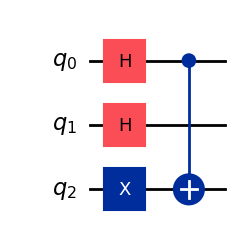

In [85]:


qcr = QuantumCircuit(3)


#superposición de direcciones
qcr.h(0)                 # (|0> + |1>)/√2  en q0
qcr.h(1)                 # (|0> + |1>)/√2  en q1

#dato base |1>
qcr.x(2)                 # pone q2 = |1>

#f(x) = NOT(q0)
qcr.cx(0, 2)             # si q0 = 1  invierte q2

# estado resultante
state = Statevector.from_instruction(qcr)
print("\nAmplitudes distintas de cero:")
for idx, amp in enumerate(state.data):
    if abs(amp) > 1e-6:
        print(f"|{format(idx,'03b')}>  →  {amp}")
qcr.draw('mpl')



#problema de Deutsch y el paralelismo cuántico

---

El **problema de Deutsch** es el primer ejemplo de un algoritmo cuántico que muestra una ventaja real frente a los algoritmos clásicos, al aprovechar las propiedades de **superposición**, **entrelazamiento** y **paralelismo cuántico**.

Planteamos  el  problema  de la siguiente forma, sea una función binaria $
f(x) \in \{0, 1\}, \quad x \in \{0, 1\}$ lo que implica que $f$ toma un bit como entrada y devuelve un bit como salida por lo que Solo existen cuatro posibles funciones de este tipo, dadas por la siguiente tabla:

| $x$ | $f_0$(x) | $f_1$(x) | $f_2$(x) | $f_3$(x) |
| --- | -------- | -------- | -------- | -------- |
| 0   | 0        | 0        | 1        | 1        |
| 1   | 0        | 1        | 0        | 1        |

Las funciones $f_0$ y $f_3$ son **constantes** mientras que las funciones $f_1$ y $f_2$ son **balanceadas**. El Objetivo es determinar si $f(x)$ es constante o balanceada con la **menor cantidad de consultas posibles**.

En la computación clásica, para determinar si $f$ es constante o no, se deben evaluar ambos valores de entrada, $x = 0$ y $x = 1$. Esto requiere dos evaluaciones de la función.Mientras que en la computación cuántica, se puede codificar simultáneamente ambas entradas $x=0$ y $x=1$ en un estado en **superposición**. Esto se logra aplicando una puerta Hadamard $H$ a un qubit inicial en $|0\rangle$:

$$
H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = |+\rangle
$$

En general, se construye el siguiente estado cuántico compuesto:

$$
|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes |0\rangle = |+\rangle \otimes |0\rangle
$$

La función $f$ se implementa como un **operador unitario** reversible $U_f$ que actúa de la siguiente forma:

$$
U_f |x\rangle |y\rangle = |x\rangle |y \oplus f(x)\rangle
$$

Esto es una puerta de tipo **CX$_f$** (controlada por $x$, modificando $y$).

Aplicando $U_f$ sobre el estado en superposición y un segundo qubit en $|0\rangle$, se obtiene:

$$
U_f(|+\rangle \otimes |0\rangle) = \frac{1}{\sqrt{2}}(|0\rangle|f(0)\rangle + |1\rangle|f(1)\rangle) \tag{4.15}
$$

Este estado ahora contiene simultáneamente la evaluación de la función en **ambas entradas**. Este es el fenómeno de se denomina  **paralelismo cuántico**.

La limitación es que la medición directa no basta. Si se mide directamente este estado, el resultado es uno de los dos posibles pares $|x, f(x)\rangle$ con probabilidad 1/2. Esto **no** permite determinar si $f$ es constante o balanceada con una sola medición.

La solución completa del **algoritmo de Deutsch** modifica el segundo qubit: se lo prepara en el estado $|-\rangle$, es decir:

$$
H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = |-\rangle
$$

El estado inicial completo es:

$$
|0\rangle \otimes |1\rangle \xrightarrow{H \otimes H} |+\rangle \otimes |-\rangle = \frac{1}{2}(|0\rangle + |1\rangle)(|0\rangle - |1\rangle)
$$

Al aplicar el operador $U_f$, se obtiene un estado con **información de fase**:

$$
U_f(|+\rangle \otimes |-\rangle) = \frac{1}{\sqrt{2}}[(-1)^{f(0)}|0\rangle + (-1)^{f(1)}|1\rangle] \otimes |-\rangle
$$

Este fenómeno, llamado **retroceso de fase (phase kick-back)**, transfiere la información de $f(x)$ a la fase del primer qubit.

Finalmente, se aplica una puerta Hadamard al primer qubit:

* Si $f(0) = f(1)$, el estado es $\pm |+\rangle \rightarrow H \rightarrow |0\rangle$
* Si $f(0) \neq f(1)$, el estado es $\pm |-\rangle \rightarrow H \rightarrow |1\rangle$

Por tanto, **una sola medición del primer qubit** permite distinguir entre funciones constantes y balanceadas.




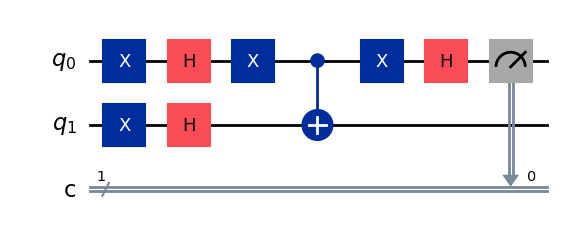

In [87]:
qcdeutz = QuantumCircuit(2,1 )
qcdeutz.x([0,1])
qcdeutz.h([0, 1])


def oraculoU(f):
    qcaux = QuantumCircuit(2,1)
    if f == 'f0':  # f(x) = 0 compuerta identidad I
        pass
    elif f == 'f1':  # f(x) = x  si entra 0  resultado 0  si entra 1 el resultado es uno, tenemos 2 qubit eso es una  CNOT
        qcaux.cx(0, 1)

    elif f == 'f2':  # f(x) = ¬x entonces invertimos el primero y con CNOT odtenemos el estado de segundo relicando la tabla de verdad
         qcaux.x(0)
         qcaux.cx(0, 1)
         qcaux.x(0)
    elif f == 'f3':  # f(x) = 1  aplicar X al qubit 1 (y⊕1 = ¬y)
         qcaux.x(1)
    return qcaux

qcdeutz.compose(oraculoU("f2"),inplace = True )
qcdeutz.h(0)
qcdeutz.measure(0, 0)
qcdeutz.draw('mpl')

Resultados de la medición: {'0': 1024}


**La función es BALANCEADA**

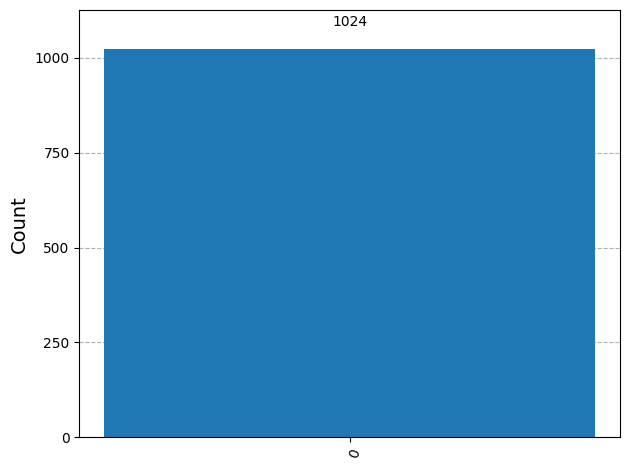

In [88]:

simulator = AerSimulator()
t_qc       = transpile(qcdeutz, simulator)

job     = simulator.run(t_qc, shots=1024)
result  = job.result()
counts  = result.get_counts()

print("Resultados de la medición:", counts)


if '1' in counts:
    display(Markdown("**La función es CONSTANTE**"))
else:
    display(Markdown("**La función es BALANCEADA**"))

plot_histogram(counts)



#salidas esperadas

| Función | Definición | f(0) | f(1) | Clasificación  |
| ------- | ---------- | ---- | ---- | -------------- |
| f0    | f(x) = 0   | 0    | 0    | **Constante**  |
| f1    | f(x) = x   | 0    | 1    | **Balanceada** |
| f2    | f(x) = ¬x  | 1    | 0    | **Balanceada** |
| f3    | f(x) = 1   | 1    | 1    | **Constante**  |



###(Phase Kick-Back)

---

phase kick-back constituye un mecanismo fundamental en el diseño de diversos algoritmos cuánticos, entre ellos el algoritmo de **Deutsch**, **Deutsch-Jozsa**, **estimación de fase cuántica** y el **algoritmo de Shor**.  este efecto permite la transferencia de información desde un qubit controlado hacia el qubit de control, manifestándose como una modificación de la **fase relativa** de este último.Aunque intuitivamente se espera que una compuerta controlada solo afecte al qubit de destino, el retroceso de fase puede alterar también el estado del controlador mas  específicamente su fase.

Recordemos la definicion de una compuerta controlada, sea $U$ una compuerta unitaria de un solo qubit. $CU$ controlada, actua sobre dos qubits y se define como:

$$
CU = |0\rangle\langle 0| \otimes I + |1\rangle\langle 1| \otimes U
$$

Ahora supongamos que el segundo qubit está preparado en un **autovector** de la compuerta unitaria $U$, es decir:

$$
U|\phi\rangle = e^{i\theta}|\phi\rangle
$$

además  el primer qubit  se encuentra en una superposición general:

$$
|\psi\rangle = \alpha_0|0\rangle + \alpha_1|1\rangle
$$

El estado conjunto inicial del sistema es entonces:

$$
|\Psi_{\text{in}}\rangle = |\psi\rangle \otimes |\phi\rangle = \alpha_0|0\rangle|\phi\rangle + \alpha_1|1\rangle|\phi\rangle
$$

Aplicando la compuerta controlada $CU$:

$$
CU |\Psi_{\text{in}}\rangle = \alpha_0|0\rangle I|\phi\rangle + \alpha_1|1\rangle U|\phi\rangle = \alpha_0|0\rangle|\phi\rangle + \alpha_1|1\rangle e^{i\theta}|\phi\rangle
$$

Factorizando el segundo qubit:

$$
CU |\Psi_{\text{in}}\rangle = (\alpha_0|0\rangle + \alpha_1 e^{i\theta}|1\rangle) \otimes |\phi\rangle
$$

Este resultado muestra que, aunque el segundo qubit permanece inalterado (en $|\phi\rangle$), el primer qubit ha adquirido una **fase relativa** $e^{i\theta}$ entre los componentes $|0\rangle$ y $|1\rangle$. Esto constituye el **retroceso de fase**, por el cual la información de la fase global del segundo qubit ha sido trasladada al primero.



#### Ejemplo

Considérese ahora la compuerta $\text{CNOT} = CX$, donde $X$ es la compuerta de Pauli-X, cuyos autovectores son:

$$
X|+\rangle = |+\rangle, \quad X|-\rangle = -|-\rangle
$$

Si el qubit destino se encuentra en el estado $|-\rangle$, con valor propio $-1$, y el qubit de control en $|\psi\rangle = \alpha_0|0\rangle + \alpha_1|1\rangle$, el estado tras aplicar CNOT será:

$$
CX(|\psi\rangle \otimes |-\rangle) = \alpha_0|0\rangle|-\rangle - \alpha_1|1\rangle|-\rangle = (\alpha_0|0\rangle - \alpha_1|1\rangle) \otimes |-\rangle
$$

Nuevamente, el efecto observable es una inversión de fase relativa en el qubit controlador, es decir, un retroceso de fase de $\pi$ .






### Validez del algoritmo de Deutsch

---

El algoritmo de Deutsch resuelve el problema de determinar si una función booleana de un bit de entrada $f$ es **constante** o **balanceada** utilizando una única evaluación cuántica de la función.

La validez del algoritmo se fundamenta en  que representa la función como una compuerta cuántica controlada, la función $f$ se implementa como una compuerta cuántica **controlada**, llamada $CX_f$, que actúa de la siguiente forma:

   $$
   CX_f = |0\rangle\!\langle 0| \otimes X^{f(0)} + |1\rangle\!\langle 1| \otimes X^{f(1)},
   $$

Esta compuerta aplica un cambio en el segundo qubit dependiendo del valor de $f(x)$, y al mismo tiempo introduce una **fase relativa** en el primer qubit si el segundo está preparado en el estado $|-\rangle$.

Se prepara el segundo qubit en el estado $|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$, que es **autovector** de las compuertas $X_0$ y $X_1$ con autovalores $(+1)$ y $(-1)$, respectivamente. Esto implica que:

   $$
   X_{f(x)}|-\rangle = (-1)^{f(x)}|-\rangle.
   $$

Al aplicar $CX^f$ sobre el estado $|-\rangle|-\rangle$, el efecto de $f(0)$ y $f(1)$ se codifica en la **fase relativa** del primer qubit:

   $$
   |\psi\rangle = \frac{1}{\sqrt{2}}\left( (-1)^{f(0)}|0\rangle - (-1)^{f(1)}|1\rangle \right)|-\rangle.
   $$

Dependiendo de si $f(0) = f(1)$ o $f(0) \neq f(1)$, este estado resulta proporcional a $|-\rangle$ si $f$ es **constante** $|+\rangle$ si $f$ es **no constante**.Luego  se mide el primer qubit en la base diagonal $\{ |+\rangle, |-\rangle \}$. El resultado de la medición permite determinar de forma determinista si $f$ es constante o no.





### Teorema de No Clonación y clonación clásica en computación cuántica

---

El **teorema de no clonación** constituye una de las afirmaciones más fundamentales y distintivas respecto a la computación clásica. Este teorema establece que **no existe un operador unitario** capaz de copiar, de manera exacta y universal, un **estado cuántico **.

Supóngamos, por contradicción, que existe un operador unitario $U$ que pueda clonar cualquier estado cuántico $|\psi\rangle$. Esto implicaría que para cualquier qubit inicial implicaria y se cumpliría la transformación:

$$
U \left( |\psi\rangle \otimes |0\rangle \right) = |\psi\rangle \otimes |\psi\rangle
$$

Del mismo modo, si se le presenta otro estado diferente $|\phi\rangle$, también se esperaría que:

$$
U \left( |\phi\rangle \otimes |0\rangle \right) = |\phi\rangle \otimes |\phi\rangle
$$

Ahora bien, debido a la **linealidad**, si consideramos una superposición arbitraria de ambos estados, por ejemplo $|\chi\rangle = \alpha|\psi\rangle + \beta|\phi\rangle$, donde $\alpha$ y $\beta$ son coeficientes complejos tales que $|\alpha|^2 + |\beta|^2 = 1$, entonces el operador unitario debería satisfacer:

$$
U \left( |\chi\rangle \otimes |0\rangle \right) = \alpha U(|\psi\rangle \otimes |0\rangle) + \beta U(|\phi\rangle \otimes |0\rangle)
= \alpha |\psi\rangle \otimes |\psi\rangle + \beta |\phi\rangle \otimes |\phi\rangle
$$

pero si realmente pudiera clonarse el estado $|\chi\rangle$, el resultado esperado sería:

$$
|\chi\rangle \otimes |\chi\rangle = (\alpha|\psi\rangle + \beta|\phi\rangle) \otimes (\alpha|\psi\rangle + \beta|\phi\rangle)
$$

Expandiendo:

$$
\alpha^2 |\psi\rangle \otimes |\psi\rangle + \alpha\beta |\psi\rangle \otimes |\phi\rangle + \beta\alpha |\phi\rangle \otimes |\psi\rangle + \beta^2 |\phi\rangle \otimes |\phi\rangle
$$

Esta **contradicción** demuestra que tal operador unitario no puede existir si se desea clonar un estado arbitrario, lo que prueba  teorema de no clonación.

Este resultado establece que no existe una operación cuántica universal que permita copiar un estado arbitrario e inicialmente desconocido de un sistema cuántico. Las implicaciones de este teorema son profundas y se manifiestan en múltiples niveles de la teoría y la práctica cuántica.
